<a href="https://colab.research.google.com/github/1cg2cg3cg/this_and_that/blob/main/backtrader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

RSI를 이용한 추세매매

In [1]:
!pip install pandas
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
!pip install backtrader


     |████████████████████████████████| 6.3 MB 9.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=81ec102e0138b452ab7942621d936c048b107e56484bb4fe28219de3591819cc
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 410 kB 8.7 MB/s 


In [ ]:
db = yf.download("BTC-USD", start = "2020-01-01", )
db.asfreq(freq = 'D', method = 'ffill')[['Close']]
df =db.Close.rolling(window = 20).mean() #20일값씩 평균낸 값
dv= df.dropna(axis=0) # 결측값제거





In [ ]:
#단기 이동평균값
#def SMA (db, period = 30, column ='Close') :
    #return db[column].rolling(window = period).mean()



In [ ]:
#Relative Strength Index
#import numpy as np
#def RSI(db, period = 14, column = 'Close') :
  # delta = db[column].diff(1)
 #  delta = delta.dropna()

 #  up = delta.copy() 
 #  down = delta.copy()
 #  up[up<0] = 0
 #  down[down>0] =0
 #  db['up'] = up
  # db['down'] = down

   #AVG_Gain = SMA(db, period, column = 'up')
   #AVG_Loss = abs(SMA(db, period, column = 'down'))
   #RS = AVG_Gain/AVG_Loss

   #RSI = 100.0 - (100.0/(1.0 + RS))
   #db['RSI'] = RSI

   #return db

 

In [3]:
#각 지표를 dataframe에 추가하기
#db = RSI(db, period =14)
#db['SMA'] = SMA(db, period = 30)

#df = db.dropna(axis =0)


!pip install quandl

In [ ]:
btcusd = quandl.get("BITFINEX/BTCUSD", authtoken="VdeBmuKmDhXb7S-jMDqf", start_date="2020-01-01", end_date="2021-08-02")
print('btcusd', type(btcusd))

start 10000


<IPython.core.display.Javascript object>

[738004.0] [<__main__.firstStrategy object at 0x7f70e64e45d0>]
Final Portfolio Value : $nan
P/L : $nan


posx and posy should be finite values
posx and posy should be finite values


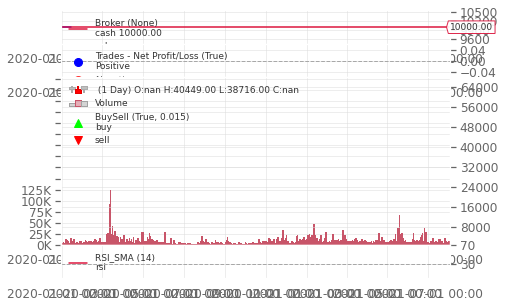

In [83]:
#매매전략

from datetime import datetime
import backtrader as bt
import quandl
%matplotlib inline

class firstStrategy(bt.Strategy) :
        def __init__(self) :
           
           self.rsi = bt.indicators.RSI_SMA(self.data.close, period=14) #rsi 계산 기간 14일로 설정
        
        def next(self) :
            if not self.position :
                if self.rsi < 30:
                    self.buy(size=100)

            else :
                    if self.rsi > 70 :
                         self.sell(size=100)
    
startcash = 10000  #초기금액
cerebro = bt.Cerebro()

cerebro.addstrategy(firstStrategy) #RSI 투자전략 cerebro에 전달

data = bt.feeds.PandasData(
    dataname = d,
)

# quantstats.reports.plots(btcusd['High'], mode='basic')
# quantstats.reports.plots(btcusd['Low'], mode='basic')

cerebro.adddata(data) #data전달
cerebro.broker.setcash(startcash) #초기금액 세팅
print('start',cerebro.broker.getvalue())
c = cerebro.run()
cerebro.plot(style='candlestick')
print(*map(list,c), c)
portvalue = cerebro.broker.getvalue() #결과  2020-1-1 ~ 2021-08-03까지 결과

pnl = portvalue - startcash #차익계산

 #결과출력
print('Final Portfolio Value : ${}'.format(portvalue))  
print('P/L : ${}'.format(pnl))

 #차트출력
# cerebro.plot(style ='candlestick')   

In [48]:
# !pip install quantstats
import quantstats


In [98]:
class firstStrategy(bt.Strategy) :
    def __init__(self) :
        
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=14) #rsi 계산 기간 14일로 설정
    
    def next(self) :
        if not self.position :
            if self.rsi < 30:
                self.buy(size=100)

        else :
            if self.rsi > 70 :
                self.sell(size=100)

cerebro = bt.Cerebro(stdstats=False)

# Add a strategy
cerebro.addstrategy(firstStrategy)

# skiprows = 1 if args.noheaders else 0
# header = None if args.noheaders else 0

# skiprows = 1
# header = None

skiprows = 0
header = 0

dataframe = pandas.read_csv(
    # 'https://www.quandl.com/data/BITFINEX/BTCUSD',
    'https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv',
    skiprows=skiprows,
    header=header,
    parse_dates=True,
    index_col=0)

data = bt.feeds.PandasData(dataname=dataframe)

cerebro.adddata(data)

cerebro.broker.setcash(startcash) #초기금액 세팅

print('start',cerebro.broker.getvalue())
cerebro.addstrategy(firstStrategy) #RSI 투자전략 cerebro에 전달

cerebro.run()

portvalue = cerebro.broker.getvalue() #결과  2020-1-1 ~ 2021-08-03까지 결과

pnl = portvalue - startcash #차익계산

#결과출력
print('Final Portfolio Value : ${}'.format(portvalue))  
print('P/L : ${}'.format(pnl))

start 10000
Final Portfolio Value : $10000.0
P/L : $0.0


In [ ]:
d = pandas.read_csv(
    # 'https://www.quandl.com/data/BITFINEX/BTCUSD',
    'https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2003-01-01&end_date=2003-03-06',
    skiprows=skiprows,
    header=header,
    parse_dates=True,
    index_col=0)
d

start 10000
Final Portfolio Value : $12061.999999999998
P/L : $2061.999999999998


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 5 Axes>]]

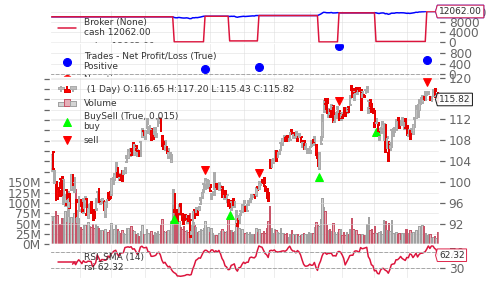

In [122]:
class firstStrategy(bt.Strategy) :
    def __init__(self) :
        
        self.rsi = bt.indicators.RSI_SMA(self.data.close, period=14) #rsi 계산 기간 14일로 설정
    
    def next(self) :
        if not self.position :
            if self.rsi < 30:
                self.buy(size=100)

        else :
            if self.rsi > 70 :
                self.sell(size=100)

cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(firstStrategy)

skiprows = 0
header = 0

d = pandas.read_csv(
    # 'https://www.quandl.com/data/BITFINEX/BTCUSD',
    'https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2016-01-01&end_date=2017-01-01',
    skiprows=skiprows,
    header=header,
    parse_dates=True,
    index_col=0,
    )

data2 = bt.feeds.PandasData(
    dataname=d.sort_index(),
    
    )

cerebro.adddata(data2)

cerebro.broker.setcash(startcash) #초기금액 세팅

print('start',cerebro.broker.getvalue())
cerebro.run()

portvalue = cerebro.broker.getvalue() #결과  2020-1-1 ~ 2021-08-03까지 결과

pnl = portvalue - startcash #차익계산

#결과출력
print('Final Portfolio Value : ${}'.format(portvalue))  
print('P/L : ${}'.format(pnl))
cerebro.plot(style='candlestick')

In [ ]:
  #@title : example
  import backtrader as bt
  from datetime import datetime

  class firstStrategy(bt.Strategy):

      def __init__(self):
          self.rsi = bt.indicators.RSI_SMA(self.data.close, period=21)

      def next(self):
          if not self.position:
              if self.rsi < 30:
                  self.buy(size=100)
          else:
              if self.rsi > 70:
                  self.sell(size=100)


  #Variable for our starting cash
  startcash = 10000

  #Create an instance of cerebro
  cerebro = bt.Cerebro()

  #Add our strategy
  cerebro.addstrategy(firstStrategy)

  #Get Apple data from Yahoo Finance.

  data = bt.feeds.Quandl(
      dataname='AAPL',
      fromdate = datetime(2016,1,1),
      todate = datetime(2017,1,1),
      buffered= True
      )

  #Add the data to Cerebro
  cerebro.adddata(data)

  # Set our desired cash start
  cerebro.broker.setcash(startcash)

  # Run over everything
  cerebro.run()

  #Get final portfolio Value
  portvalue = cerebro.broker.getvalue()
  pnl = portvalue - startcash

  #Print out the final result
  print('Final Portfolio Value: ${}'.format(portvalue))
  print('P/L: ${}'.format(pnl))

  #Finally plot the end results
  cerebro.plot(style='candlestick')

In [119]:
d = pandas.read_csv(
    # 'https://www.quandl.com/data/BITFINEX/BTCUSD',
    'https://www.quandl.com/api/v3/datasets/WIKI/AAPL.csv?start_date=2016-01-01&end_date=2019-01-01',
    skiprows=skiprows,
    header=header,
    parse_dates=True,
    index_col=0,
    )
d

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.150,166.92,168.340,38962839.0,0.0,1.0,173.680000,175.150000,166.920000,168.340000,38962839.0
2018-03-26,168.07,173.100,166.44,172.770,36272617.0,0.0,1.0,168.070000,173.100000,166.440000,172.770000,36272617.0
2018-03-23,168.39,169.920,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
2018-03-22,170.00,172.680,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-21,175.04,175.090,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,98.55,99.110,96.76,96.960,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
2016-01-07,98.68,100.130,96.43,96.450,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-06,100.56,102.370,99.87,100.700,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0


In [121]:
d.sort_index()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-04,102.61,105.368,102.00,105.350,67649387.0,0.0,1.0,99.136516,101.801154,98.547165,101.783763,67649387.0
2016-01-05,105.75,105.850,102.41,102.710,55790992.0,0.0,1.0,102.170223,102.266838,98.943286,99.233131,55790992.0
2016-01-06,100.56,102.370,99.87,100.700,68457388.0,0.0,1.0,97.155911,98.904640,96.489269,97.291172,68457388.0
2016-01-07,98.68,100.130,96.43,96.450,81094428.0,0.0,1.0,95.339552,96.740467,93.165717,93.185040,81094428.0
2016-01-08,98.55,99.110,96.76,96.960,70798016.0,0.0,1.0,95.213952,95.754996,93.484546,93.677776,70798016.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.090,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,171.270000,35247358.0
2018-03-22,170.00,172.680,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,168.845000,41051076.0
2018-03-23,168.39,169.920,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,164.940000,40248954.0
